In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import os

ModuleNotFoundError: No module named 'xgboost'

In [42]:
import sys
!{sys.executable} -m pip install xgboost

In [43]:
import xgboost

In [63]:
df = pd.read_csv(r'C:\Users\HP\Desktop\project-4\Bank MarketingDataset.csv')

In [64]:
df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
print(len(df))

37084


In [66]:
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         37084 non-null  int64  
 1   profession      37084 non-null  object 
 2   marital         37084 non-null  object 
 3   schooling       37084 non-null  object 
 4   default         37084 non-null  object 
 5   housing         37084 non-null  object 
 6   loan            37084 non-null  object 
 7   contact         37084 non-null  object 
 8   month           37084 non-null  object 
 9   day_of_week     37084 non-null  object 
 10  campaign        37084 non-null  int64  
 11  pdays           37084 non-null  int64  
 12  previous        37084 non-null  int64  
 13  poutcome        37084 non-null  object 
 14  emp.var.rate    37084 non-null  float64
 15  cons.price.idx  37084 non-null  float64
 16  cons.conf.idx   37084 non-null  float64
 17  euribor3m       37084 non-null 

<IPython.core.display.Javascript object>


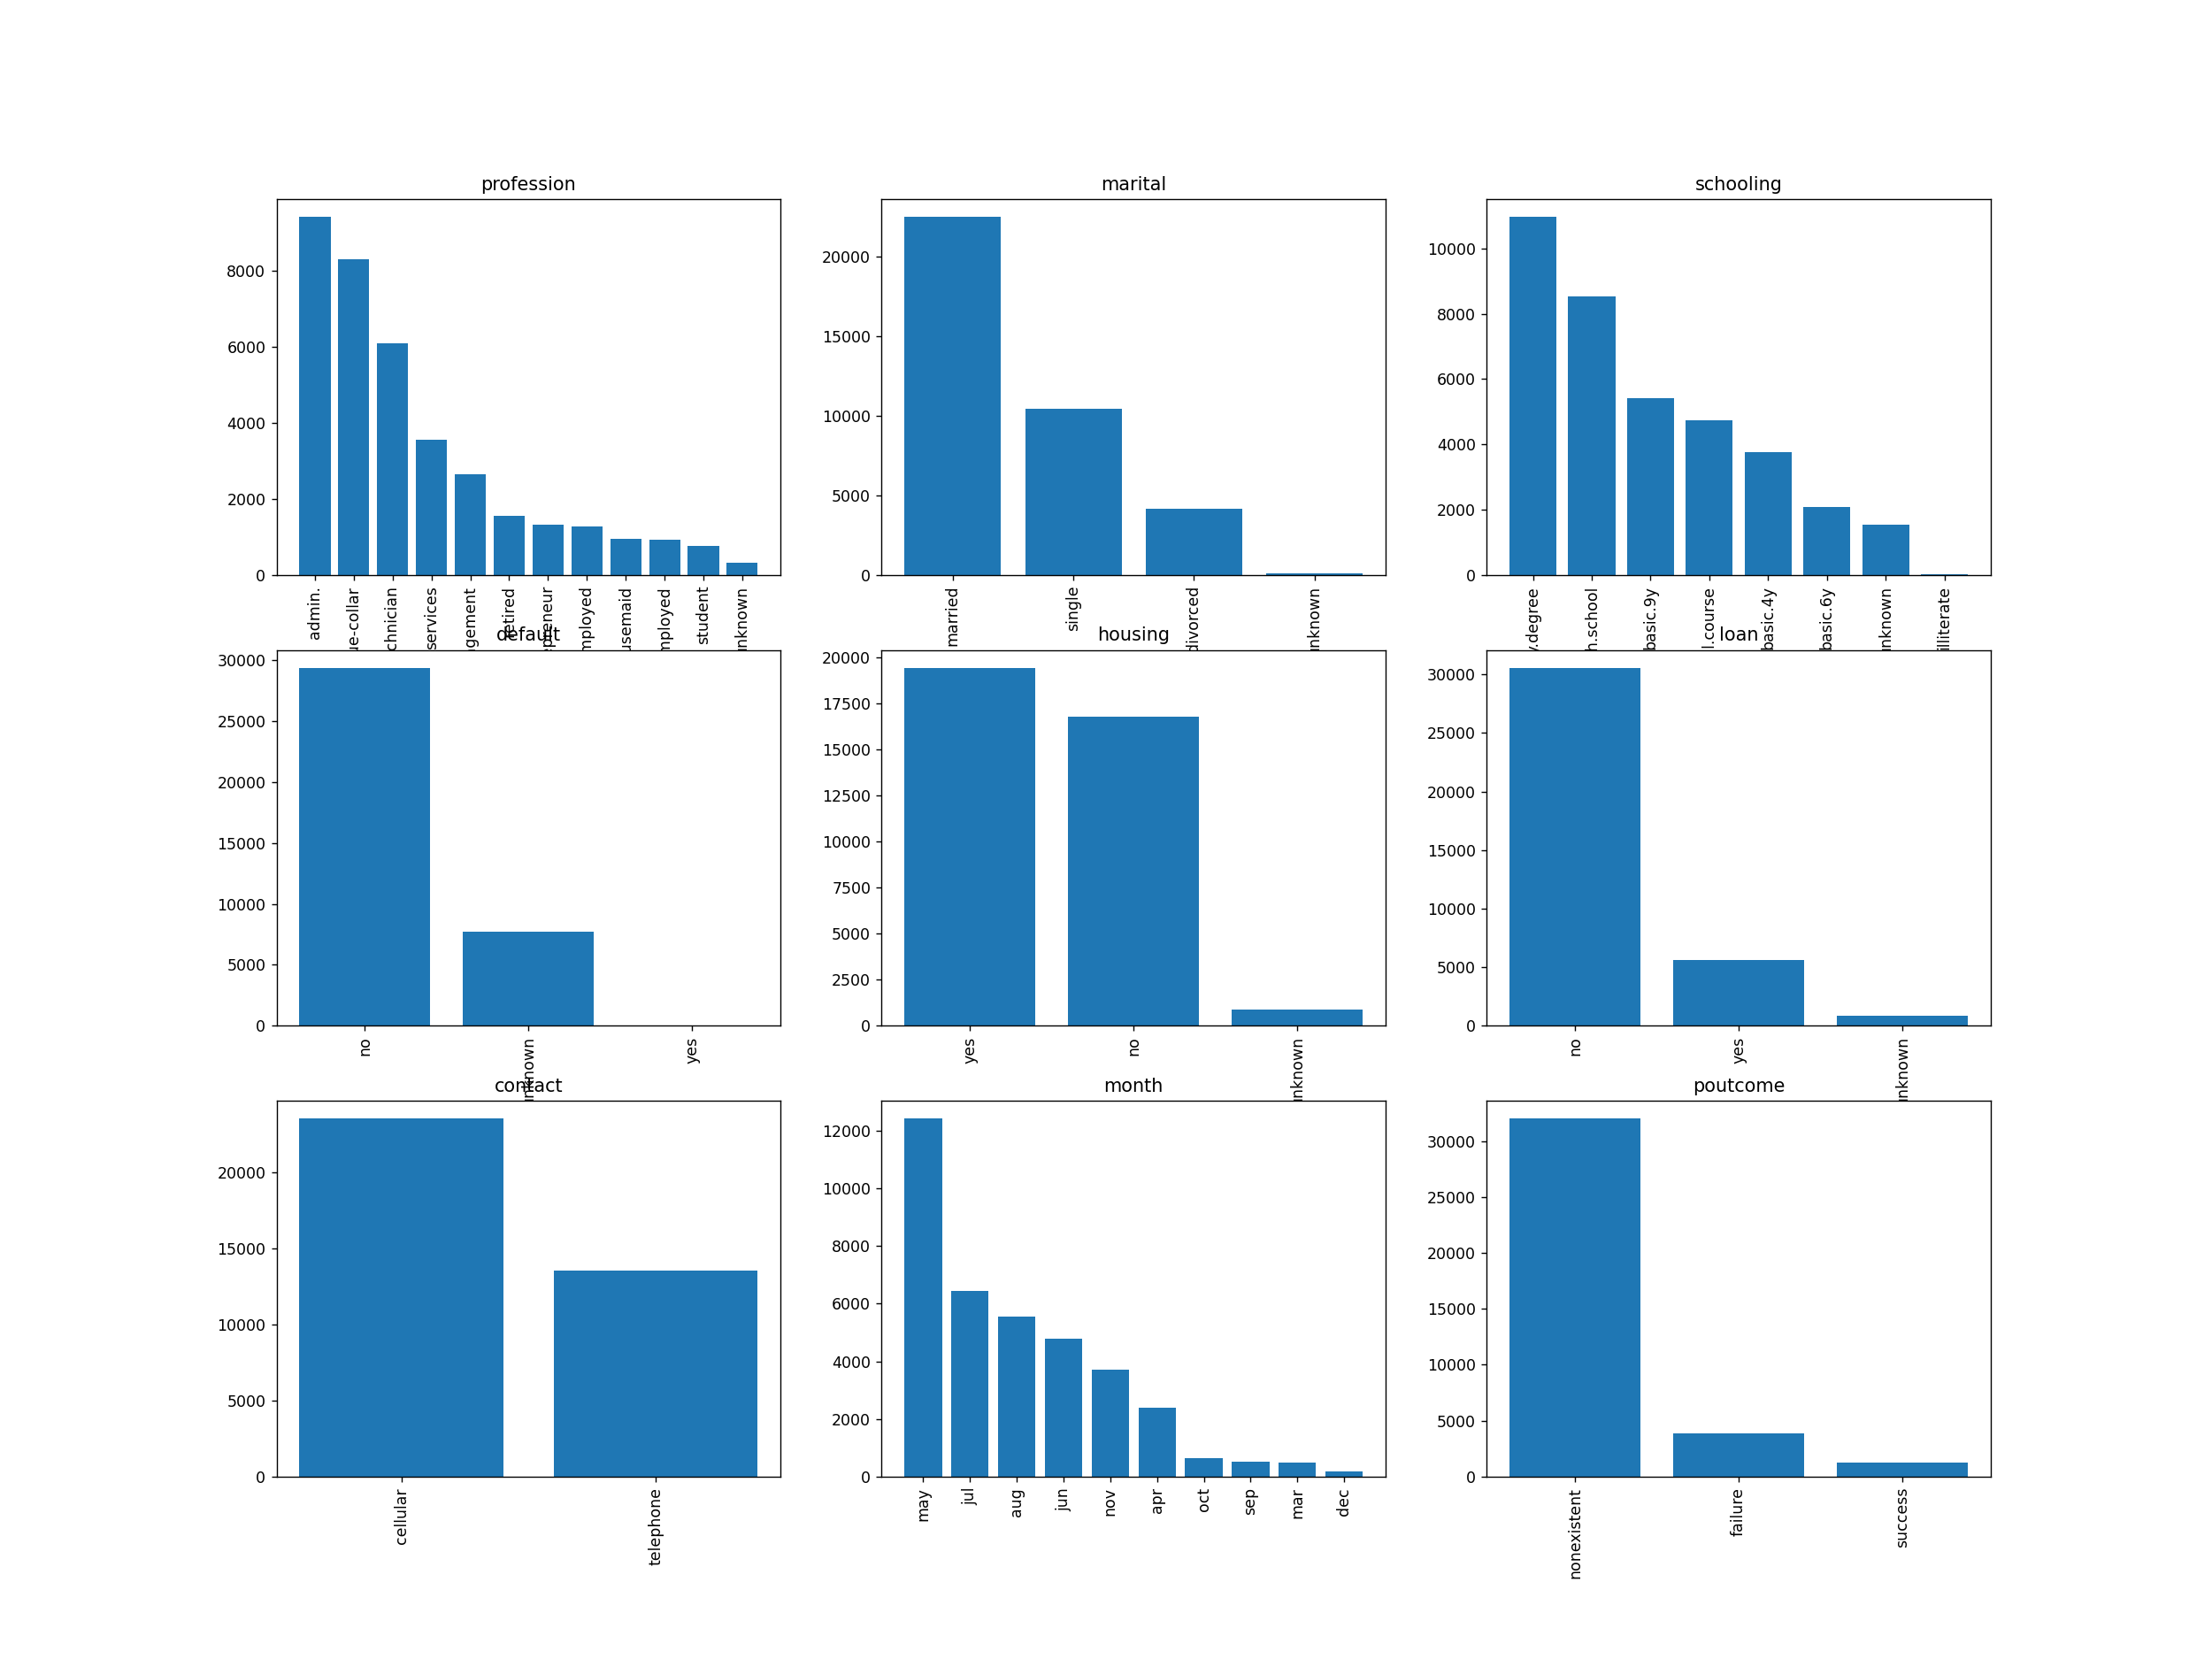

In [68]:
cat_columns = ['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

In [69]:
df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,40.042714,2.569545,962.530849,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10.432965,2.770611,186.773063,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         37084 non-null  int64  
 1   profession      37084 non-null  object 
 2   marital         37084 non-null  object 
 3   schooling       37084 non-null  object 
 4   default         37084 non-null  object 
 5   housing         37084 non-null  object 
 6   loan            37084 non-null  object 
 7   contact         37084 non-null  object 
 8   month           37084 non-null  object 
 9   day_of_week     37084 non-null  object 
 10  campaign        37084 non-null  int64  
 11  pdays           37084 non-null  int64  
 12  previous        37084 non-null  int64  
 13  poutcome        37084 non-null  object 
 14  emp.var.rate    37084 non-null  float64
 15  cons.price.idx  37084 non-null  float64
 16  cons.conf.idx   37084 non-null  float64
 17  euribor3m       37084 non-null 

<IPython.core.display.Javascript object>


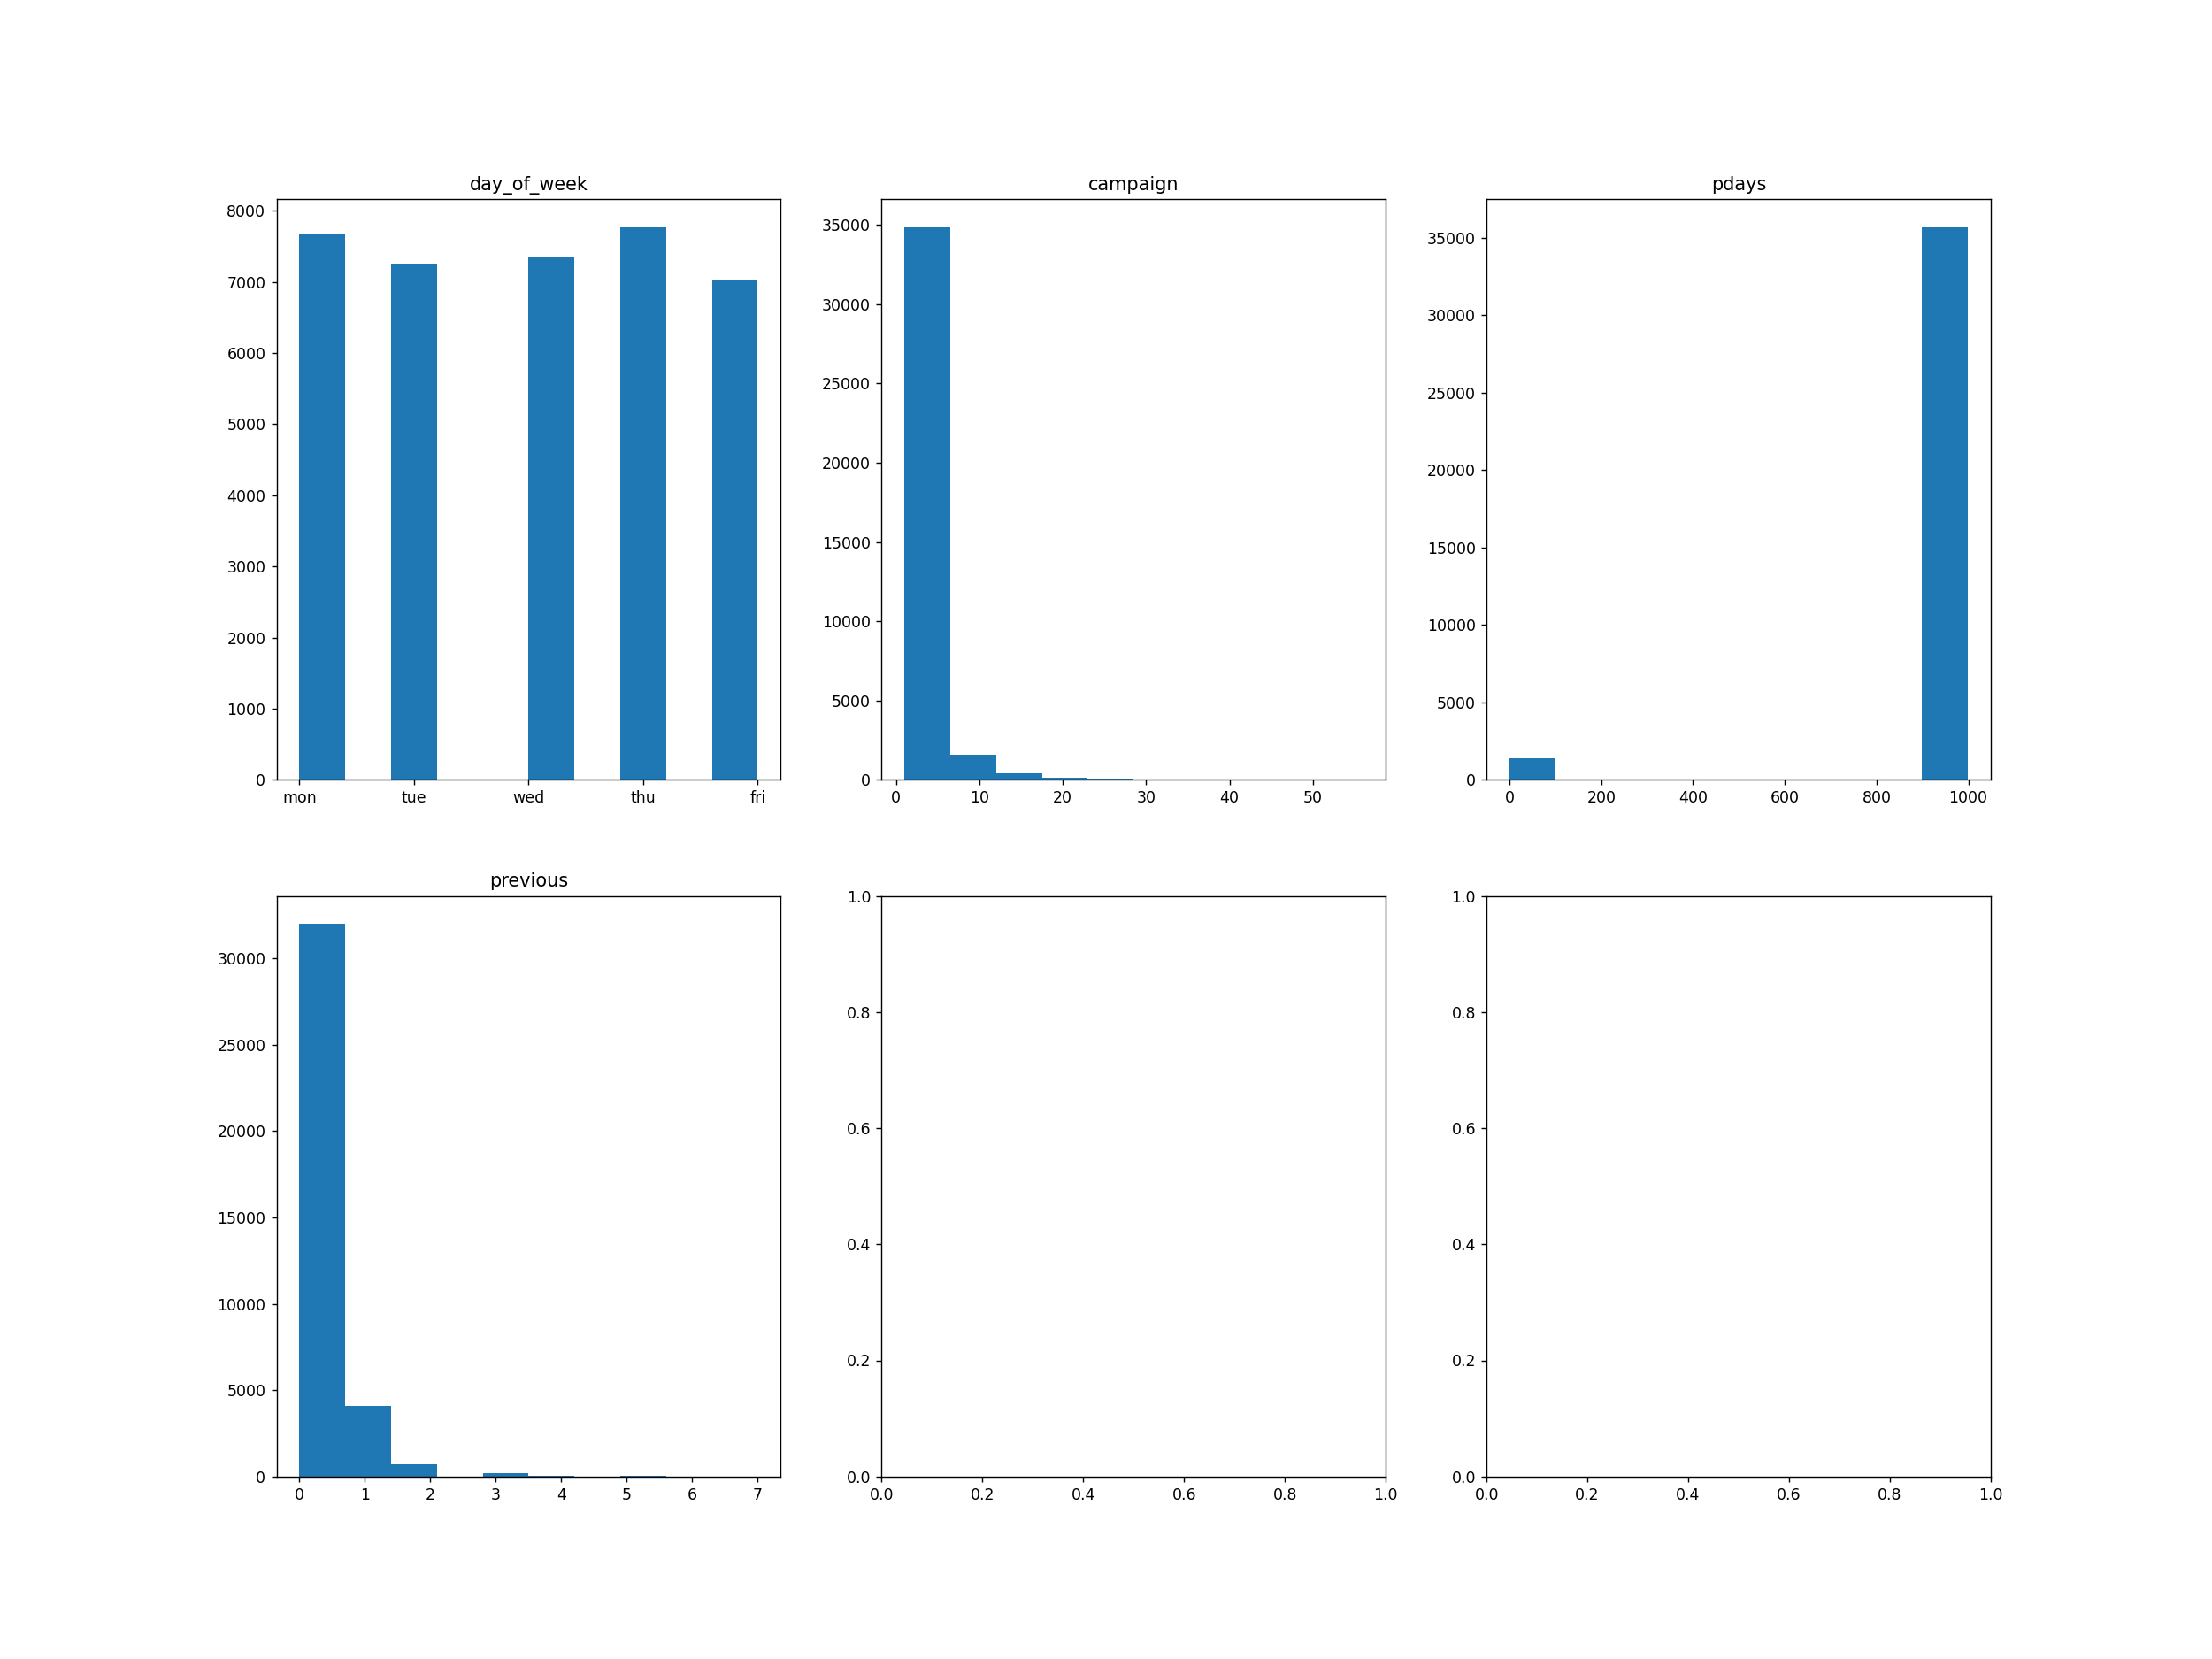

In [71]:
num_columns = ['day_of_week','campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [72]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,37084.000000,37084.000000,37084.000000
mean,962.530849,2.569545,0.172986
std,186.773063,2.770611,0.495681
min,0.000000,1.000000,0.000000
25%,999.000000,1.000000,0.000000
50%,999.000000,2.000000,0.000000
75%,999.000000,3.000000,0.000000
max,999.000000,56.000000,7.000000


In [73]:
len (df[df['pdays'] > 400] ) / len(df) * 100

96.32725703807571

In [74]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035055549563153925

In [75]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.0

In [76]:
#responded
value_counts = df['responded '].value_counts()

value_counts.plot.bar(title = 'Responded')

<AxesSubplot:title={'center':'Responded'}>

In [77]:
print(df['responded '].value_counts())

no     32876
yes     4208
Name: responded , dtype: int64


In [81]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['responded '] == 'yes']['profession'].value_counts()
j_df['no'] = df[df['responded '] == 'no']['profession'].value_counts()

j_df.plot.bar(title = 'Responded based on profession')

<AxesSubplot:title={'center':'Responded based on profession'}>

In [82]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['responded '] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['responded '] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Responded based on marital status')

<AxesSubplot:title={'center':'Responded based on marital status'}>

In [83]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['responded '] == 'yes']['schooling'].value_counts()
j_df['no'] = df[df['responded '] == 'no']['schooling'].value_counts()

j_df.plot.bar(title = 'Reponded based on schooling')

<AxesSubplot:title={'center':'Reponded based on schooling'}>

In [84]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['responded '] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['responded '] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Reponded based on contact type')

<AxesSubplot:title={'center':'Reponded based on contact type'}>

In [86]:
a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['responded '] == 'yes'][['responded ','custAge']].describe())['custAge']
a_df['age_no'] = (df[df['responded '] == 'no'][['responded ','custAge']].describe())['custAge']

a_df

,age_yes,age_no
count,4208.000000,32876.00000
mean,40.962928,39.92493
std,13.865754,9.90220
min,17.000000,17.00000
25%,31.000000,32.00000
50%,37.000000,38.00000
75%,50.000000,47.00000
max,98.000000,95.00000


In [87]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Reponded based on age')

<AxesSubplot:title={'center':'Reponded based on age'}>

In [90]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['responded '] == 'yes'][['responded ','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['responded '] == 'no'][['responded ','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,4208.000000,32876.000000
mean,2.048004,2.636300
std,1.661395,2.875126
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,23.000000,56.000000


In [91]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Responded based on the campaign')

<AxesSubplot:title={'center':'Responded based on the campaign'}>

In [92]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['responded '] == 'yes'][['responded ','previous']].describe())['previous']
p_df['previous_no'] = (df[df['responded '] == 'no'][['responded ','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,4208.000000,32876.000000
mean,0.493584,0.131950
std,0.861150,0.409158
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,6.000000,7.000000


In [93]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Responded based on the previous campaign')

<AxesSubplot:title={'center':'Responded based on the previous campaign'}>

In [94]:
p_df.value_counts()

previous_yes  previous_no 
0.000000      0.000000        3
0.493584      0.131950        1
0.861150      0.409158        1
1.000000      0.000000        1
6.000000      7.000000        1
4208.000000   32876.000000    1
dtype: int64

In [95]:
def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'responded ']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['profession', 'marital', 'schooling', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [96]:
cleaned_df = clean_data(df)
cleaned_df.head()

,custAge,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,campaign_cleaned,previous_cleaned
0,56,mon,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,0,0,1,0,0,0,1,0,1.0,0
1,45,mon,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,0,0,1,0,0,0,1,0,1.0,0
2,59,mon,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,0,0,1,0,0,0,1,0,1.0,0
3,41,mon,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,0,0,1,0,0,0,1,0,1.0,0
4,24,mon,1.1,93.994,-36.4,4.857,5191.0,0,1,0,...,0,0,1,0,0,0,1,0,1.0,0


In [98]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   custAge                        37084 non-null  int64  
 1   day_of_week                    37084 non-null  object 
 2   emp.var.rate                   37084 non-null  float64
 3   cons.price.idx                 37084 non-null  float64
 4   cons.conf.idx                  37084 non-null  float64
 5   euribor3m                      37084 non-null  float64
 6   nr.employed                    37084 non-null  float64
 7   default_bool                   37084 non-null  int64  
 8   housing_bool                   37084 non-null  int64  
 9   loan_bool                      37084 non-null  int64  
 10  responded _bool                37084 non-null  int64  
 11  profession_blue-collar         37084 non-null  uint8  
 12  profession_entrepreneur        37084 non-null 

In [99]:
X = cleaned_df.drop(columns = 'responded _bool')
y = cleaned_df[['responded _bool']]

In [100]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

NameError: name 'train_test_split' is not defined

In [102]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [111]:
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.day_of_week